In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time as time

In [2]:
start_timer = time.perf_counter()


def obj_function(x):
    return 20 * x - 0.5 * x**2


start = 0
stop = 30
num = 100

x = np.linspace(start, stop, num)
y = obj_function(x)

value = -np.inf
for val_x in x:
    val_y = obj_function(val_x)
    if val_y > value:
        value = val_y
        parameters = [round(val_x), round(val_y)]
print(parameters)

total_time = time.perf_counter() - start_timer
print(total_time)

[20, 200]
0.0017211000085808337


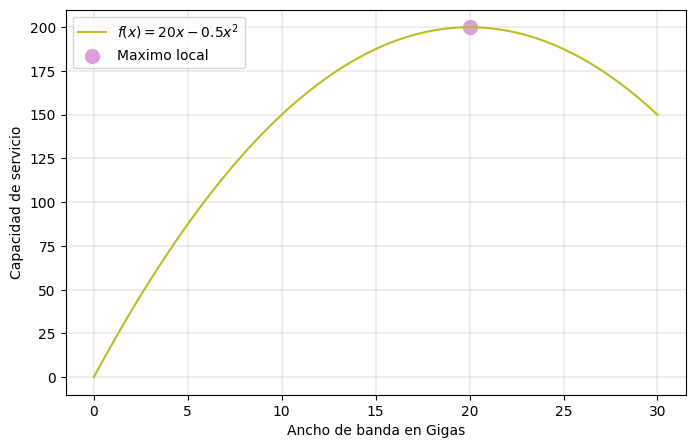

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, y, color="#bcbd22", label="$f(x) = 20x - 0.5x^2$")
ax.scatter(parameters[0],parameters[1], s=100, color="plum", label="Maximo local")

ax.set_xlabel("Ancho de banda en Gigas")
ax.set_ylabel("Capacidad de servicio")
ax.legend()
ax.grid(linewidth="0.3")

In [4]:
# x: air; y: fuel
def obj_function(x, y):
    return 25 - x**2 - y**2

start = -10
stop = 10
num = 100

x = np.linspace(start, stop, num)
y = x

cost = -np.inf

for air in x:
    for fuel in y:
        cost_fun = obj_function(air, fuel)
        if cost_fun > cost:
            cost = cost_fun
            parameters = [air, fuel]

print(cost, parameters)

24.97959391898786 [-0.10101010101010033, -0.10101010101010033]


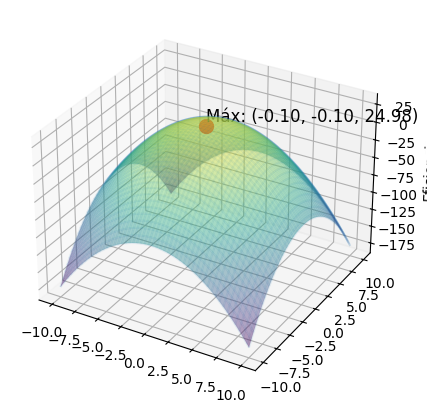

In [5]:
from mpl_toolkits import mplot3d

X, Y = np.meshgrid(x, y)
Z = obj_function(X, Y)

fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection="3d")

ax.set_zlabel("Eficiencia")

ax.plot_wireframe(X, Y, Z, alpha=0.1)
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.4)
ax.scatter(parameters[0], parameters[1], cost, color="red", s=100)

ax.text(parameters[0], parameters[1], cost, f'Máx: ({parameters[0]:.2f}, {parameters[1]:.2f}, {cost:.2f})',
        color='black', fontsize=12, horizontalalignment='left', verticalalignment='bottom')
plt.show()

In [6]:
def get_optimization(num_steps):
    start = -10
    stop = 10
    num = num_steps

    x = np.linspace(start, stop, num)
    y = x

    cost = -np.inf

    for air in x:
        for fuel in y:
            cost_fun = obj_function(air, fuel)
            if cost_fun > cost:
                cost = cost_fun
                parameters = [air, fuel]

is_executed = False
# is_executed = __name__ == "__main__"

if is_executed:
    steps = [100, 1000, 10000, 50000]
    
    time_list = []
    
    for num_steps in steps:
        start_time = time.perf_counter()
        get_optimization(num_steps)
        total_time = time.perf_counter() - start_time
        time_list.append(total_time)
    print(time_list)


In [7]:
try:
    df = pd.DataFrame()

    df["steps"] = steps
    df["Time (s)"] = time_list

    df
except:
    print("No se ha ejecutado la busqueda aumentando granularidad")

No se ha ejecutado la busqueda aumentando granularidad


No se ha ejecutado la busqueda aumentando granularidad


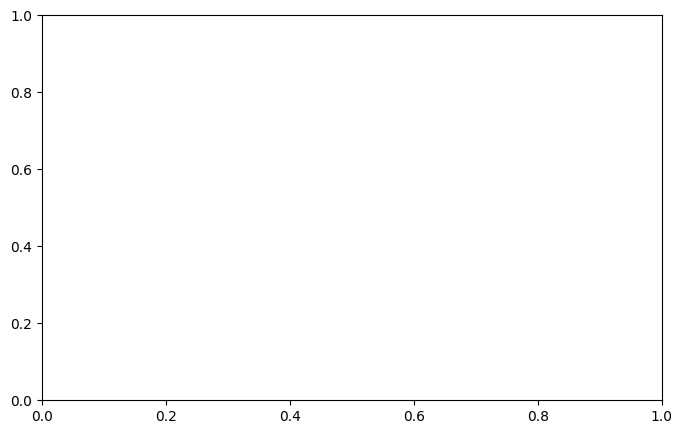

In [8]:
try:
    fig, ax = plt.subplots(figsize=(8,5))
    ax.plot(df["steps"], df["Time (s)"], "-o", color="red")
except:
    print("No se ha ejecutado la busqueda aumentando granularidad")

## Fuerza bruta: Multiparametro 2


In [9]:
time_start = time.perf_counter()

def obj_function2(x, y, z):
    return x**2 + 3*(y**2) - z * x

start = -10
stop = 20
num = 100

x = np.linspace(-10,20, num)
y = x
z = y

max_value = -np.inf
for x_value in x:
    for y_value in y:
        for z_value in z:
            value = obj_function2(x_value, y_value, z_value)
            if value > max_value:
                max_value = value
                parameters = [x_value, y_value, z_value]

time_stop = time.perf_counter() - time_start


print(f"El valor mas alto es {max_value}\nCon los valores {parameters}\nEn {time_stop}")            

El valor mas alto es 1800.0
Con los valores [20.0, 20.0, -10.0]
En 0.89078060000611


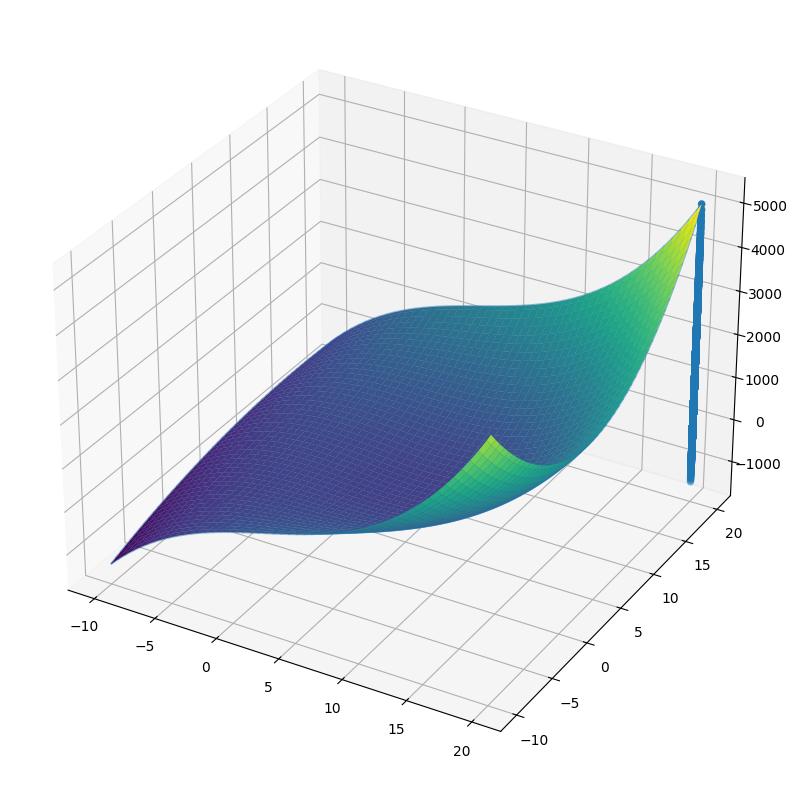

In [10]:
X, Y = np.meshgrid(x, y)
Z = obj_function2(X, Y, Z)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

ax.plot_wireframe(X, Y, Z, alpha=0.5)
surf = ax.plot_surface(X, Y, Z, cmap="viridis")
ax.scatter(parameters[0], parameters[1], Z)

# fig.colorbar(surf, ax=ax, shrink=0.2, aspect=5)

plt.show()

Los parámetros para el máximo son: [20.0, 20.0, -10]


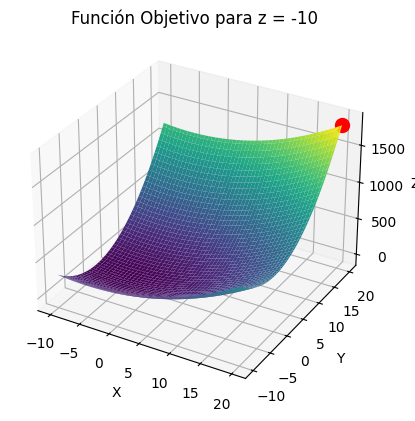

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

start = -10
stop = 20
num = 100

x = np.linspace(start, stop, num)
y = np.linspace(start, stop, num)
z = np.linspace(start, stop, num)

X, Y = np.meshgrid(x, y)

# Definición de la función objetivo
def obj_function3(x, y, z):
    return x**2 + 3 * (y**2) - z * x

# Valor fijo para z
z_value = -10

# Calcula los valores para la superficie
values = obj_function3(X, Y, z_value)

# Obtener los índices del máximo
max_index = np.unravel_index(np.argmax(values, axis=None), values.shape)

# Obtener los parámetros correspondientes al máximo
max_params = [x[max_index[1]], y[max_index[0]], z_value]

# Creación de la figura y el subplot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
surf = ax.plot_surface(X, Y, values, cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Título del gráfico
plt.title('Función Objetivo para z = -10')

# Resaltar el punto máximo
ax.scatter(max_params[0], max_params[1], obj_function3(*max_params), color='red', s=100, label='Máximo')

# Mostrar los parámetros
print(f"Los parámetros para el máximo son: {max_params}")

# Mostrar el gráfico
plt.show()
